#INTRODUCTION

The dataset originates from Kaggle and has been adjusted to categorize age groups: youth (< 19 years) and adults (≥ 19 years). This dataset contains 270,000 rows and 30 columns of data representing the risk factors, demographics, and health behaviors related to heart attacks among youth and adults in China. The dataset is designed to be realistic and diverse, reflecting a mix of medical, lifestyle, and socioeconomic factors.

# Exploration Data Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report # For model evaluation metrics
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler # For feature scaling and standardization
from sklearn.ensemble import RandomForestRegressor
import joblib
import seaborn as sns
import warnings # For removing unnecessary warnings
import matplotlib.pyplot as plt # For general-purpose plotting

In [2]:
#mounted google drive and colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Data for Analyst/heart_attack_china_youth_vs_adult.csv')

# Remove extra white space in the dataset
df.columns = df.columns.str.strip()

# Dropping some columns
df = df.drop("ID", axis=1)

**Dataset Overview**

In [5]:
# Display the first 5 rows of the dataset
df.head()

,Age,Gender,Heart_Attack,Blood_Pressure,Cholesterol,Diabetes,Smoking,Alcohol_Consumption,Exercise_Level,BMI,...,Medication,Hypertension,Heart_Rate,Physical_Activity_Hours,Dietary_Fiber_Intake,Sodium_Intake,Cultural_Background,Genetic_Risk_Score,Age_Group,Screen_Time
0,50,Female,No,147.978602,215.563010,No,No,Moderate,Low,23.637733,...,No,No,59.022408,0.566953,37.073115,2278.711795,Han,0.874595,Adult,8.294082
1,40,Female,No,119.558478,210.308676,No,Yes,NaN,Low,27.746892,...,No,No,76.564802,1.384155,35.724646,2284.789866,Han,0.643054,Adult,4.593150
2,26,Female,No,102.617993,241.415265,No,No,Heavy,Low,25.003076,...,No,No,88.519388,0.279997,20.102873,2179.251493,Other,0.715595,Adult,5.310293
3,54,Male,No,121.465827,252.900145,No,No,Moderate,High,24.177447,...,No,Yes,68.676712,1.841346,32.476741,3022.112596,Han,0.658501,Adult,4.087884
4,19,Female,No,130.216946,164.222684,No,Yes,Heavy,Low,22.665925,...,No,No,62.504824,1.088681,22.075720,3634.690298,Han,0.102311,Adult,6.533303


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      270000 non-null  int64  
 1   Gender                   270000 non-null  object 
 2   Heart_Attack             270000 non-null  object 
 3   Blood_Pressure           270000 non-null  float64
 4   Cholesterol              270000 non-null  float64
 5   Diabetes                 270000 non-null  object 
 6   Smoking                  270000 non-null  object 
 7   Alcohol_Consumption      135118 non-null  object 
 8   Exercise_Level           270000 non-null  object 
 9   BMI                      270000 non-null  float64
 10  Family_History           270000 non-null  object 
 11  Diet_Type                270000 non-null  object 
 12  Stress_Level             270000 non-null  float64
 13  Residence                270000 non-null  object 
 14  Educ

In [9]:
# Counting the unique values in the dataset
df.nunique()

,0
Age,48
Gender,3
Heart_Attack,2
Blood_Pressure,269935
Cholesterol,269978
Diabetes,2
Smoking,2
Alcohol_Consumption,2
Exercise_Level,3
BMI,269977


In [10]:
# Counting missing values
missing_values = df.isna().mean() * 100
missing_values

,0
Age,0.000000
Gender,0.000000
Heart_Attack,0.000000
Blood_Pressure,0.000000
Cholesterol,0.000000
Diabetes,0.000000
Smoking,0.000000
Alcohol_Consumption,49.956296
Exercise_Level,0.000000
BMI,0.000000


In [11]:
# Counting the number of duplicated values
duplicated_values = df.duplicated().mean()
duplicated_values

0.0

In [12]:
# Finding the distribution of Age Groups
age_group_distribution = df['Age_Group'].value_counts(normalize=True)
print("Proportion of Youth vs. Adults:")
print(age_group_distribution)

Proportion of Youth vs. Adults:
Age_Group
Adult    0.855281
Youth    0.144719
Name: proportion, dtype: float64


# Data Analysis

In [45]:
Average_Age = round(df["Age"].mean(), 2)

# Outputting Result
print(f"The Average Age of the respondents in the Dataset is {Average_Age}")

The Average Age of the respondents in the Dataset is 35.53


In [46]:
Gender_Heart_Attacks = df.groupby("Gender")["Heart_Attack"].sum()
GenderWithMostHeartAttacks = Gender_Heart_Attacks.idxmax()

# Outputting Result
print(f"The gender with the highest incidence of heart attacks is {GenderWithMostHeartAttacks}")

The gender with the highest incidence of heart attacks is Male


In [47]:
# Replace NaN values in the "Heart_Attack" column with 0
df["Heart_Attack"] = df["Heart_Attack"].fillna(0)

# Replace NaN values in the "BMI" column with the column's mean
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())

avg_bmi_with_heart_attack = df[df['Heart_Attack'] == 'Yes']['BMI'].mean()
avg_bmi_without_heart_attack = df[df['Heart_Attack'] == 'No']['BMI'].mean()

print(f"The average BMI of individuals who experienced heart attacks is {avg_bmi_with_heart_attack:.2f}.")
print(f"The average BMI of individuals who have not experienced heart attacks is {avg_bmi_without_heart_attack:.2f}.")

The average BMI of individuals who experienced heart attacks is 24.01.
The average BMI of individuals who have not experienced heart attacks is 24.00.


# Data Visualization

In [18]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    #del cat_cols[1]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 270000
Variables: 29
cat_cols: 16
num_cols: 13
cat_but_car: 0
num_but_cat: 0


<ipython-input-44-fb360bb54c33>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],ax=ax)
<ipython-input-44-fb360bb54c33>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],ax=ax)
<ipython-input-44-fb360bb54c33>:20: UserWarning: 

`distplot` is a deprecated function and

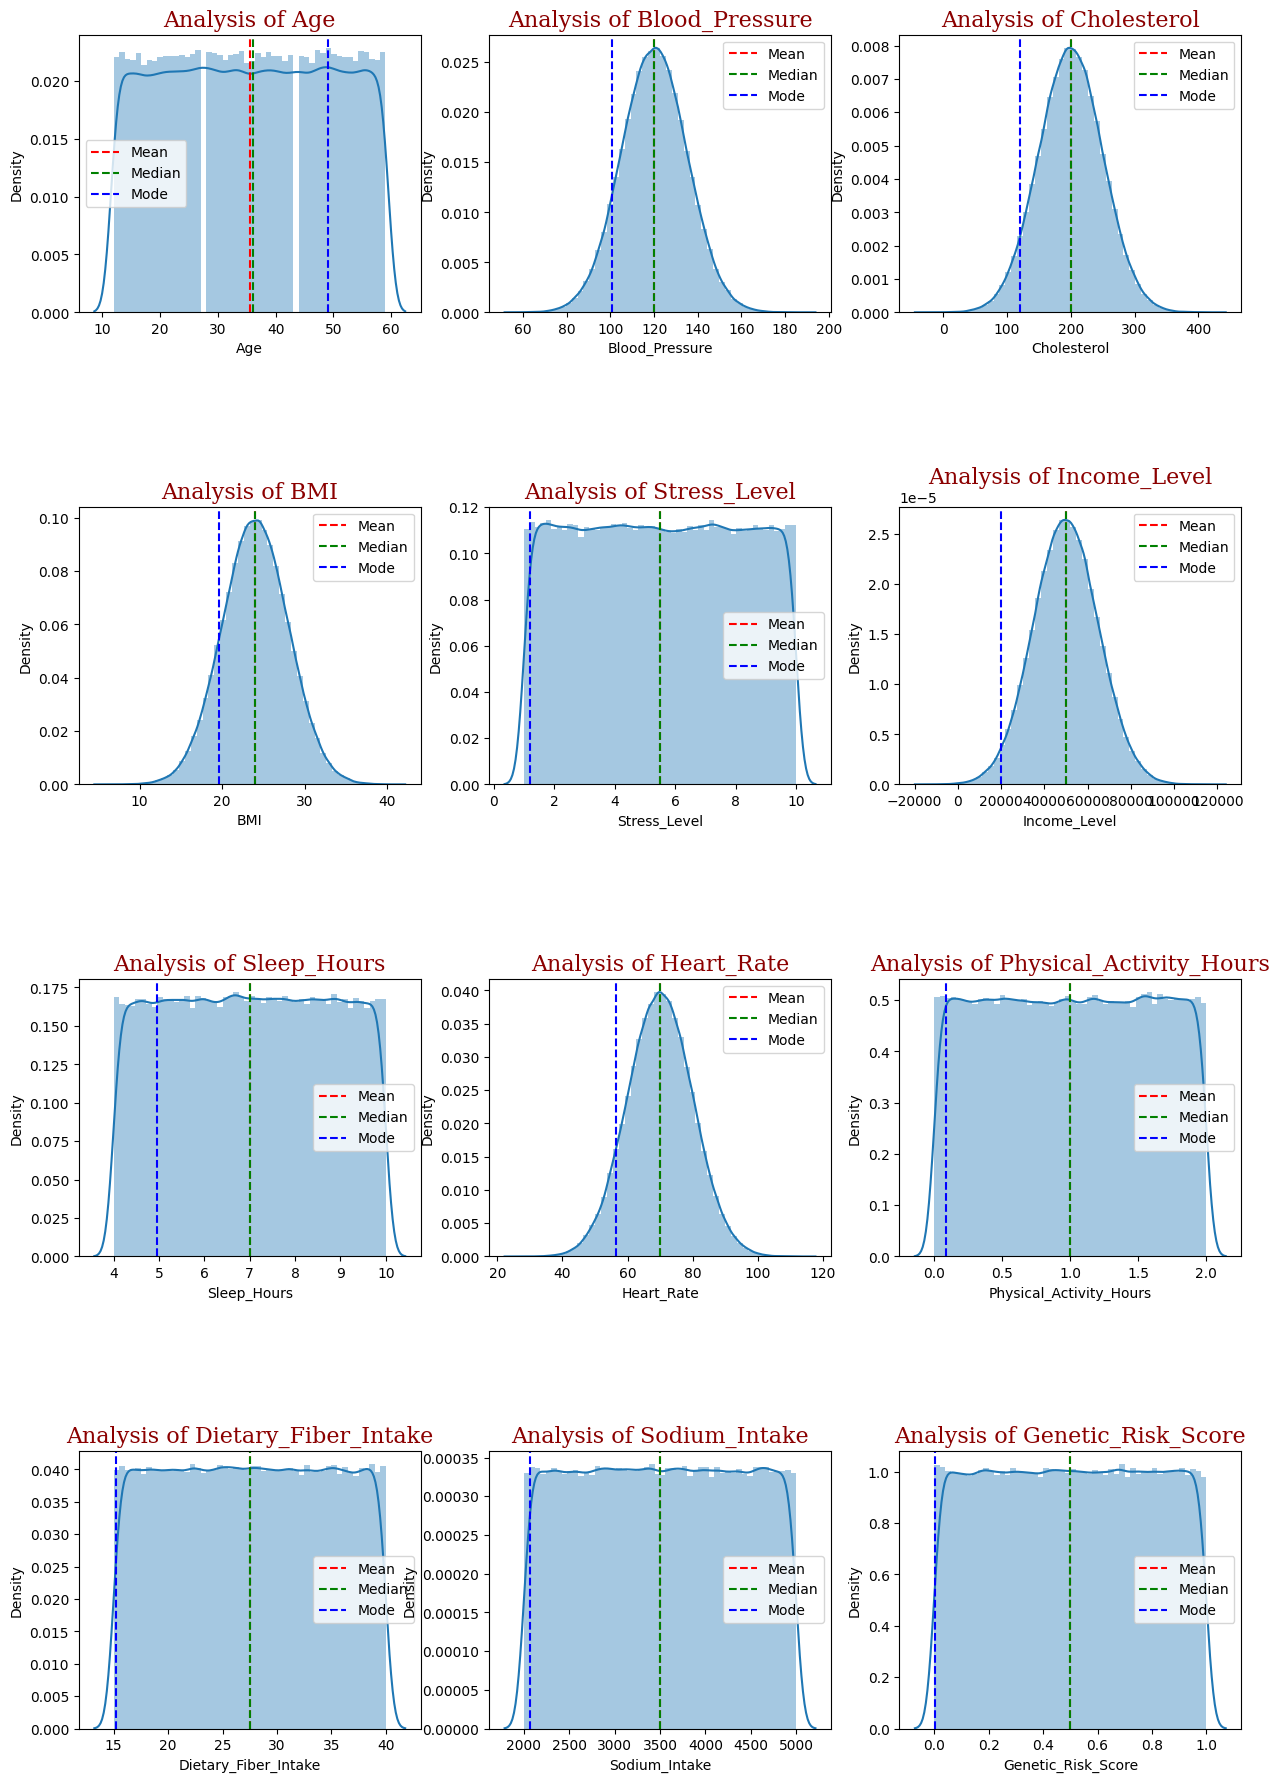

In [44]:
def generate_distribution_plot(df, num_cols):
    # create copy of dataframe
    data = df[num_cols].copy()
    # Create subplots
    fig, axes = plt.subplots(nrows=len(data.columns)//3, ncols=3,figsize=(15,22))
    fig.subplots_adjust(hspace=0.7)

    # set fontdict
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]
        sns.distplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='--', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='--', label="Mode")
        ax.legend()
    plt.show()

generate_distribution_plot(df, num_cols)

        Gender      Ratio
Gender                   
Female  129591  47.996667
Male    129581  47.992963
Other    10828   4.010370


<ipython-input-20-f4f194a536b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")


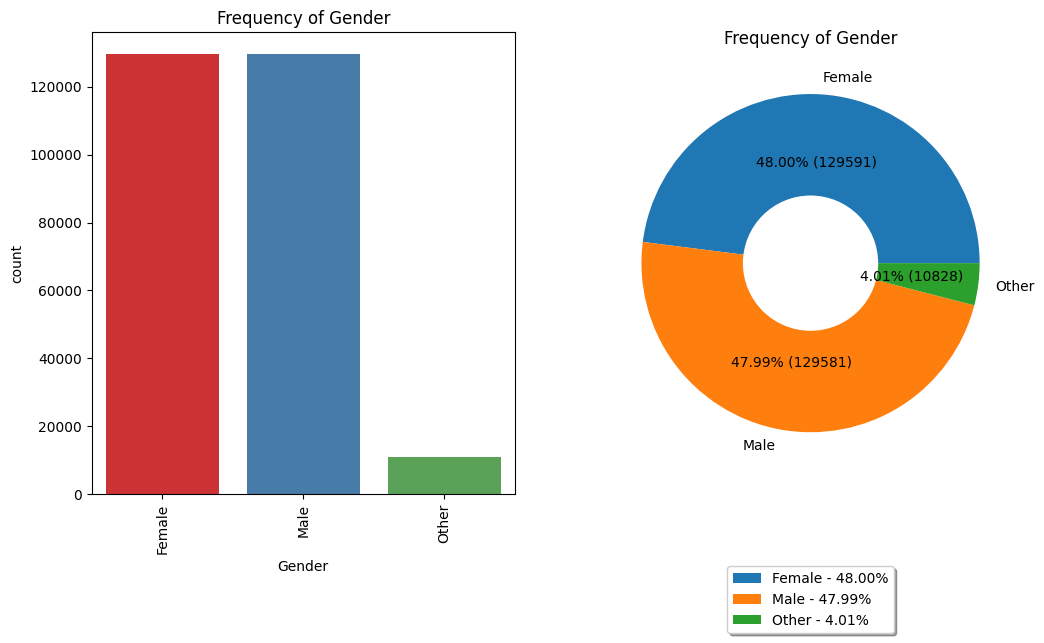

              Heart_Attack      Ratio
Heart_Attack                         
No                  238041  88.163333
Yes                  31959  11.836667


<ipython-input-20-f4f194a536b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")


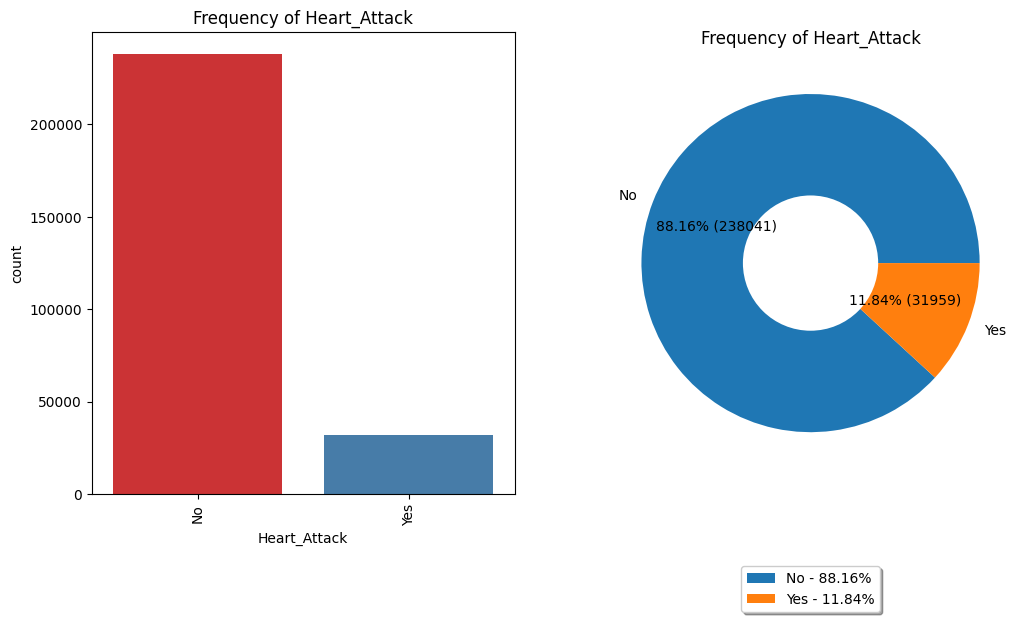

          Diabetes      Ratio
Diabetes                     
No          229461  84.985556
Yes          40539  15.014444


<ipython-input-20-f4f194a536b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")


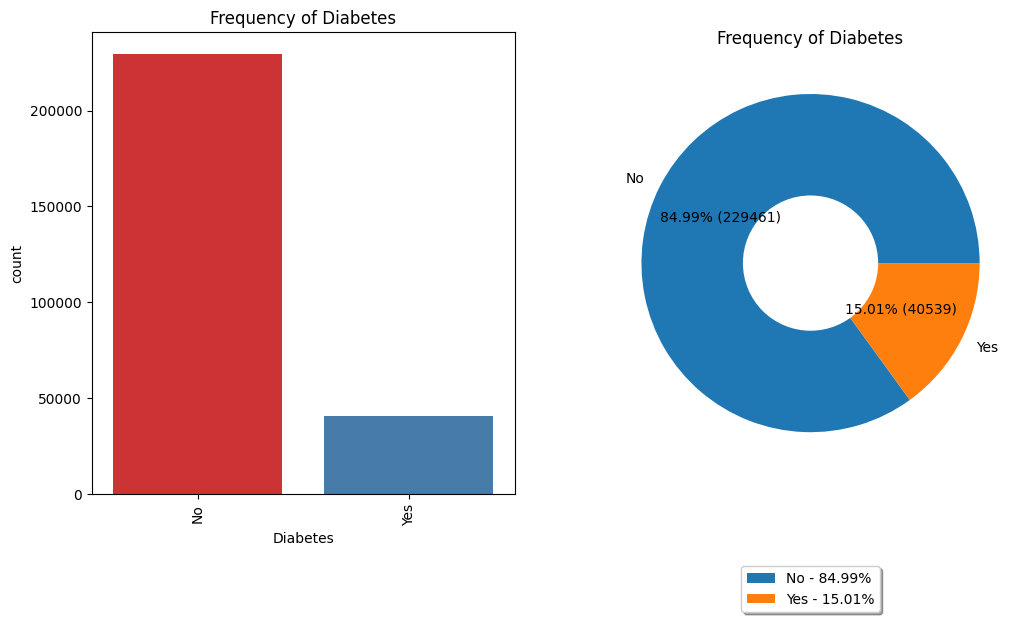

         Smoking      Ratio
Smoking                    
No        188792  69.922963
Yes        81208  30.077037


<ipython-input-20-f4f194a536b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")


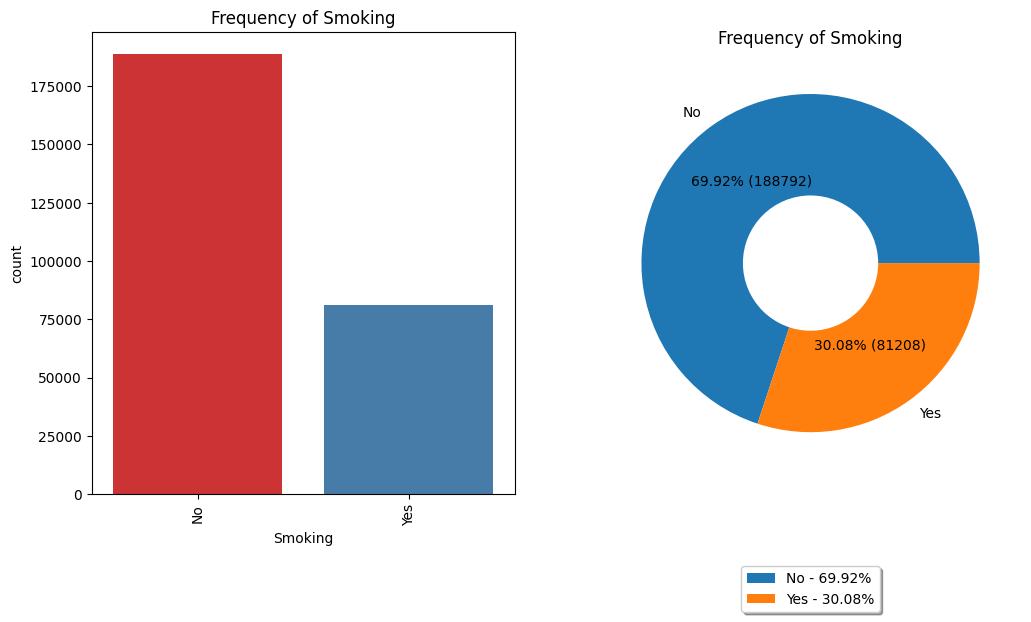

                     Alcohol_Consumption      Ratio
Alcohol_Consumption                                
Moderate                          108097  40.035926
Heavy                              27021  10.007778


<ipython-input-20-f4f194a536b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")


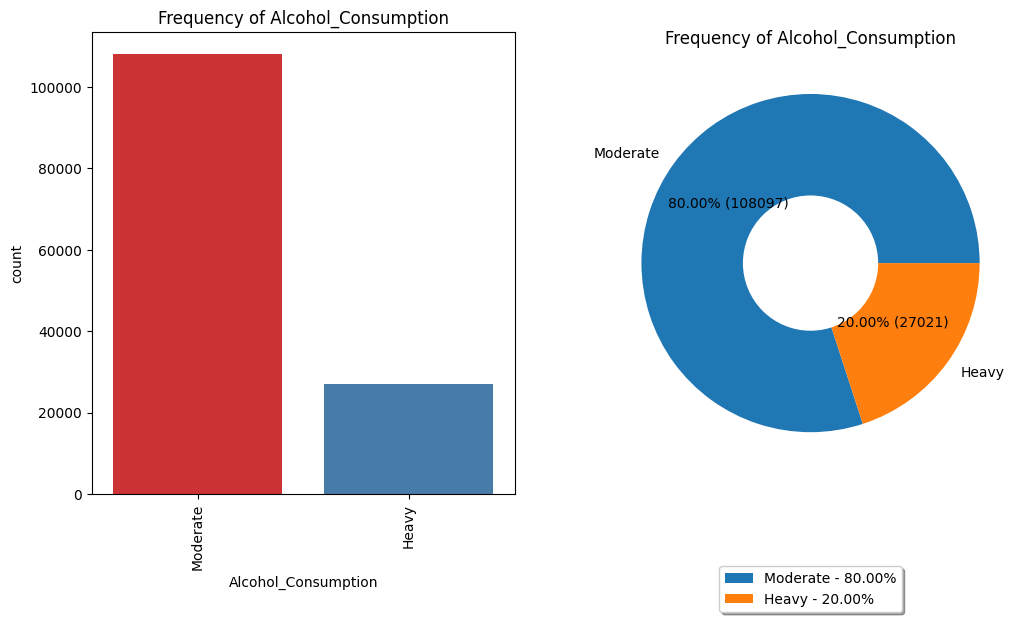

                Exercise_Level      Ratio
Exercise_Level                           
Moderate                135122  50.045185
Low                      80807  29.928519
High                     54071  20.026296


<ipython-input-20-f4f194a536b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")


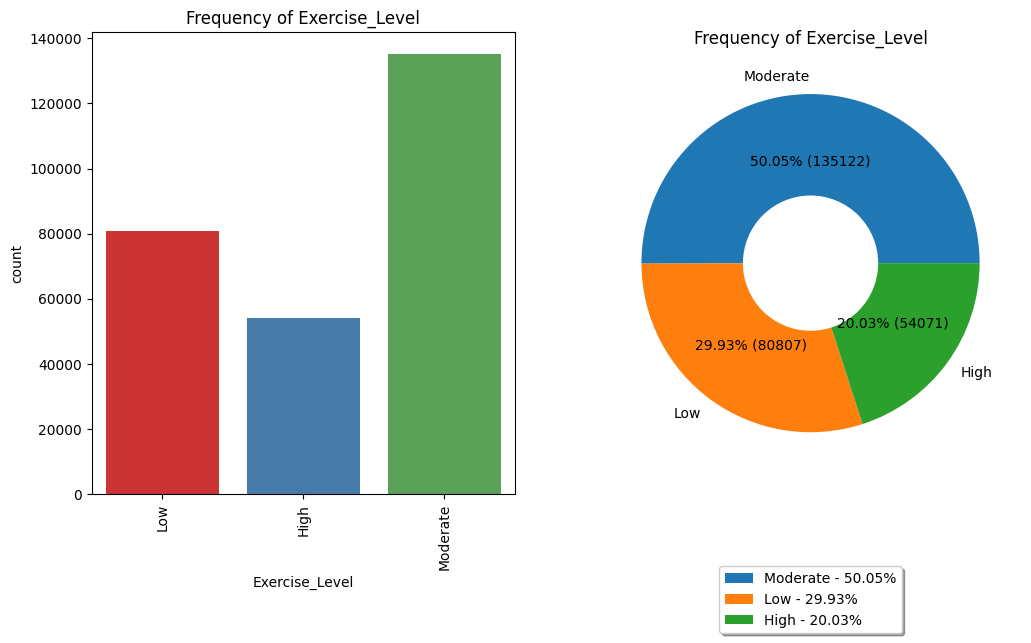

                Family_History      Ratio
Family_History                           
No                      202829  75.121852
Yes                      67171  24.878148


<ipython-input-20-f4f194a536b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")


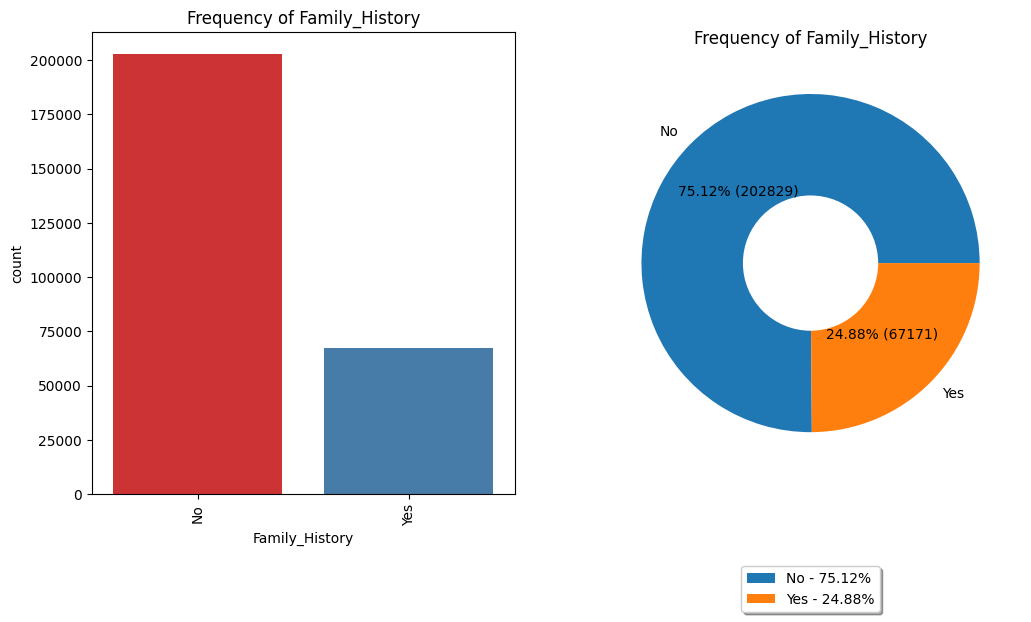

           Diet_Type      Ratio
Diet_Type                      
Healthy       108123  40.045556
Moderate      107760  39.911111
Unhealthy      54117  20.043333


<ipython-input-20-f4f194a536b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")


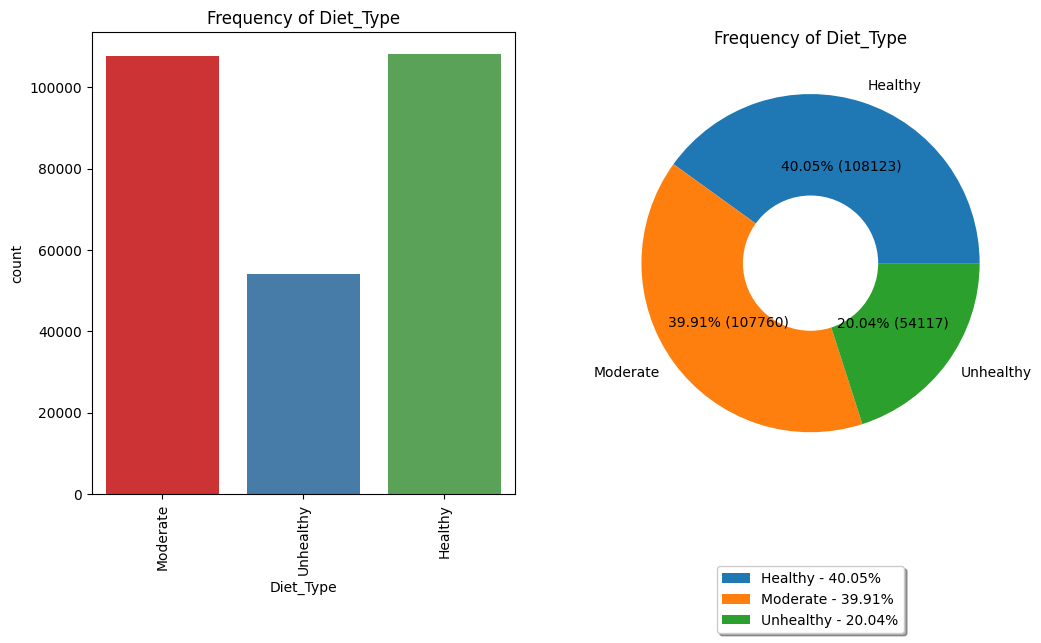

           Residence      Ratio
Residence                      
Urban         188637  69.865556
Rural          81363  30.134444


<ipython-input-20-f4f194a536b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")


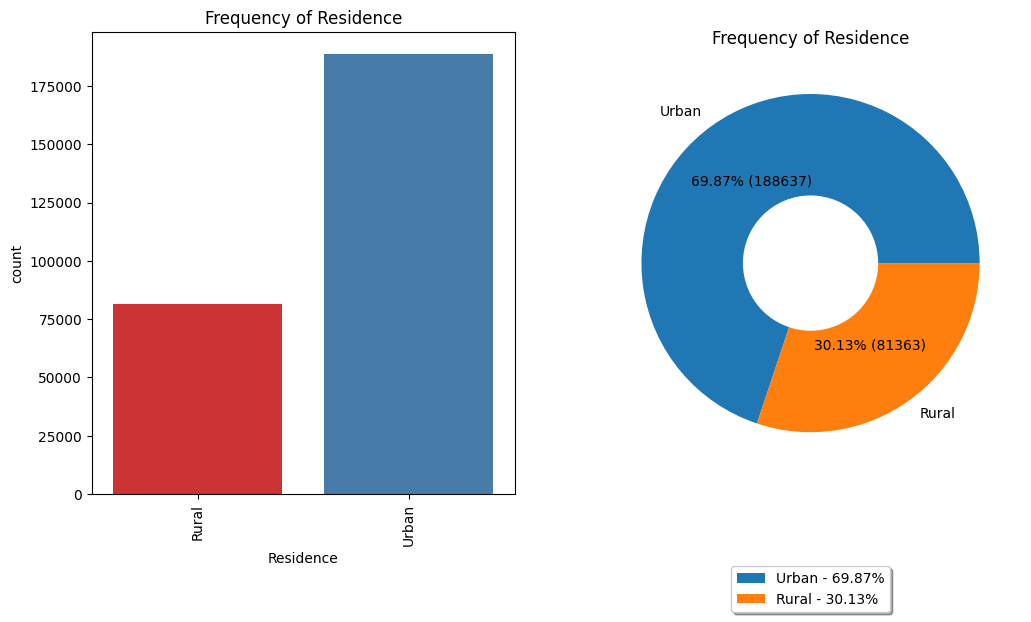

                 Education_Level      Ratio
Education_Level                            
Secondary                 134853  49.945556
Tertiary                   80972  29.989630
Primary                    54175  20.064815


<ipython-input-20-f4f194a536b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")


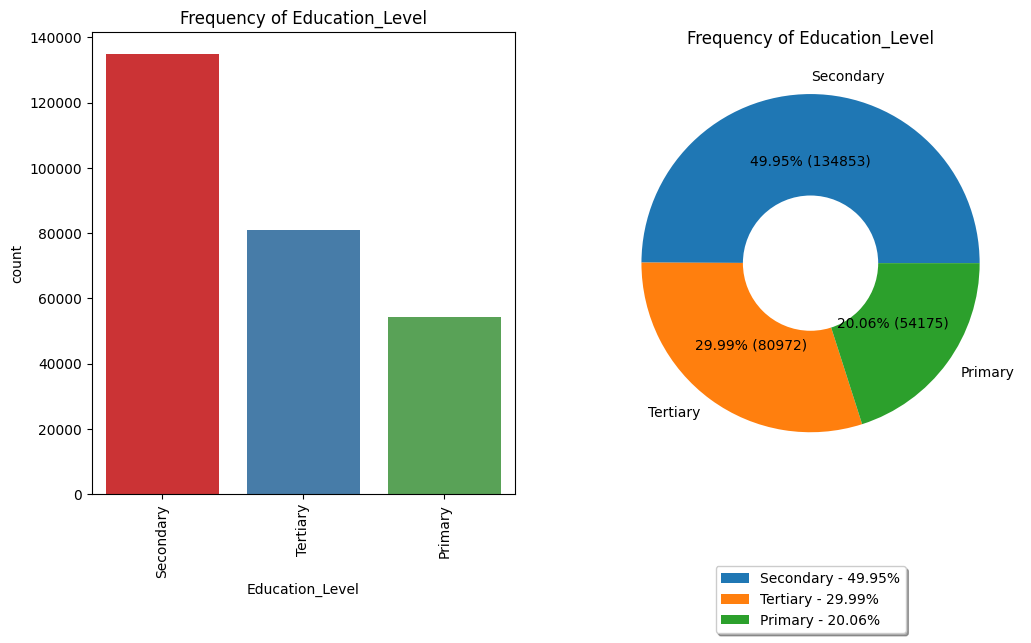

                   Employment_Status      Ratio
Employment_Status                              
Employed                      189166  70.061481
Student                        53771  19.915185
Unemployed                     27063  10.023333


<ipython-input-20-f4f194a536b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")


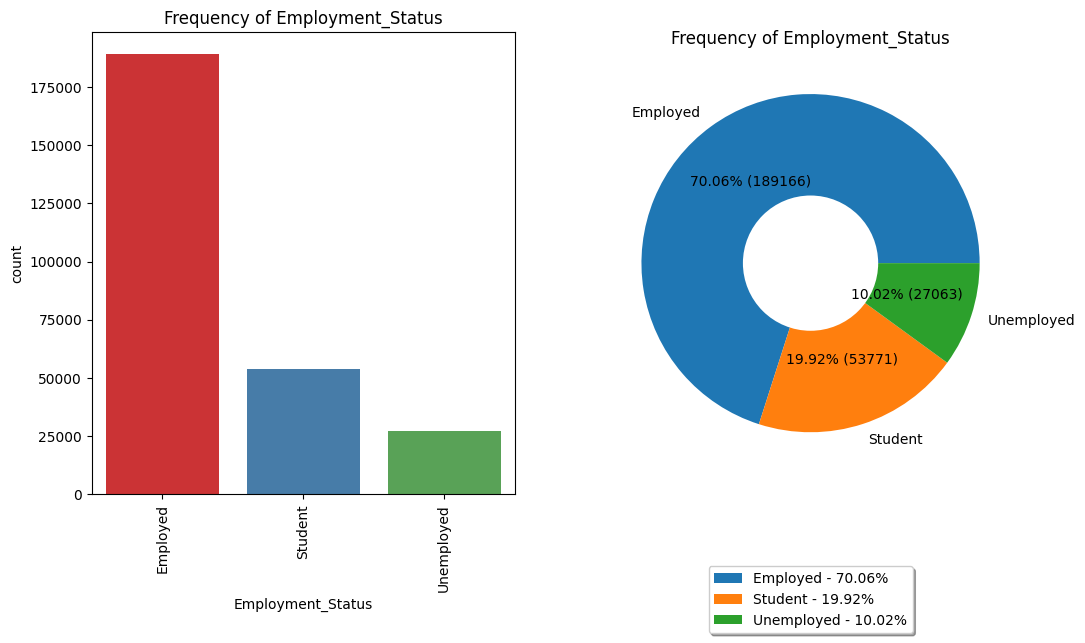

                Marital_Status      Ratio
Marital_Status                           
Married                 134948  49.980741
Single                  108068  40.025185
Divorced                 26984   9.994074


<ipython-input-20-f4f194a536b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")


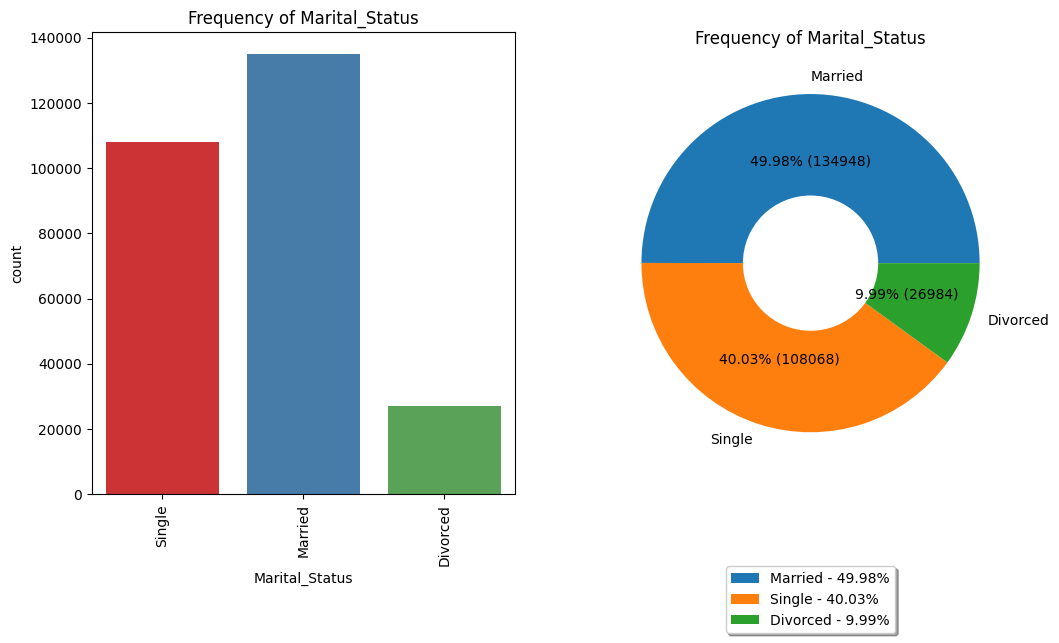

            Medication      Ratio
Medication                       
No              215885  79.957407
Yes              54115  20.042593


<ipython-input-20-f4f194a536b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")


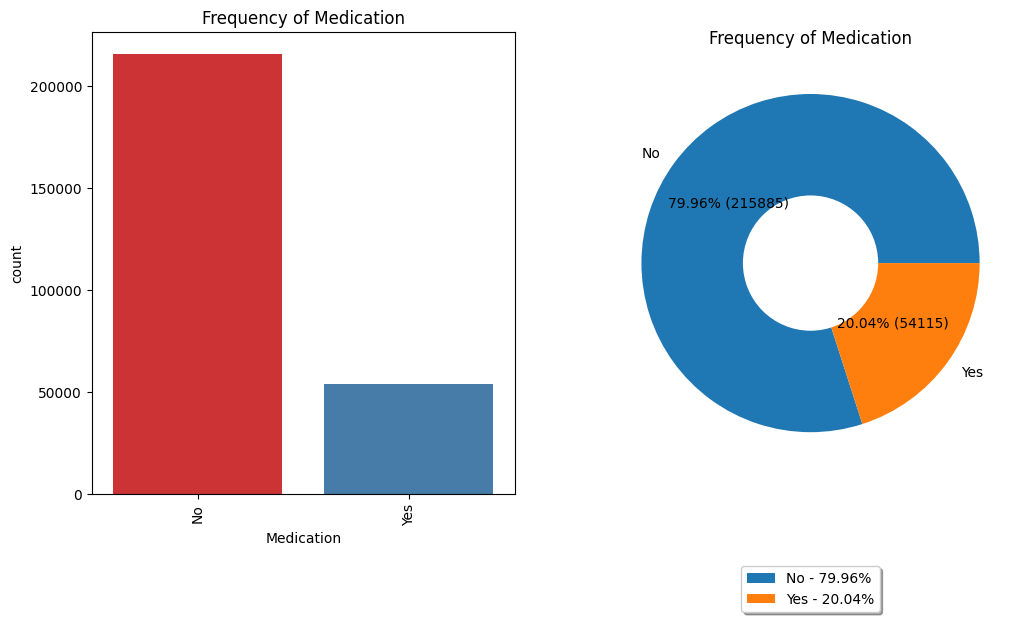

              Hypertension      Ratio
Hypertension                         
No                  216033  80.012222
Yes                  53967  19.987778


<ipython-input-20-f4f194a536b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")


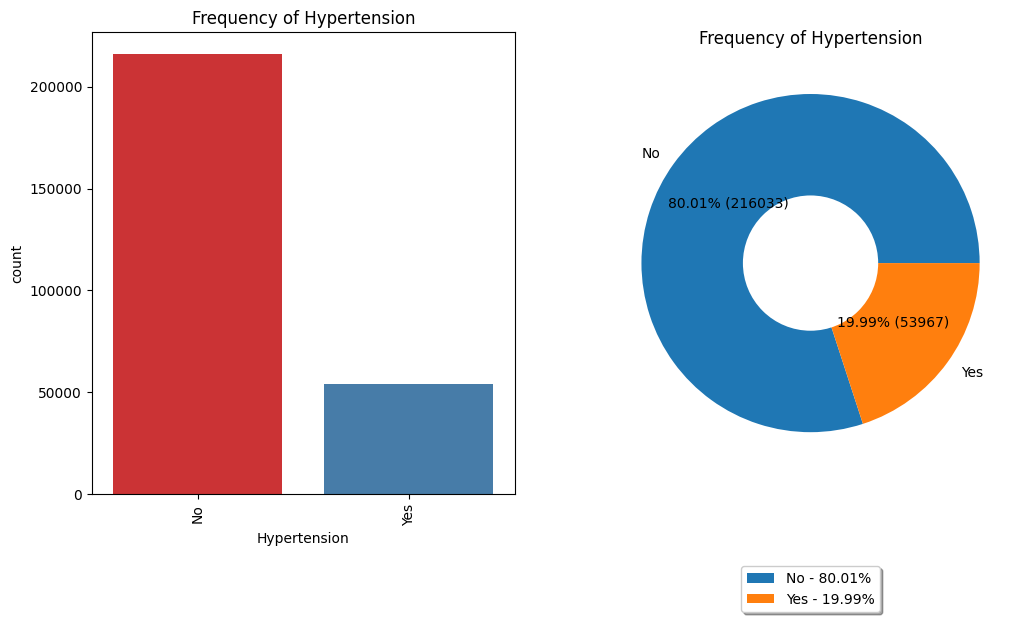

                     Cultural_Background     Ratio
Cultural_Background                               
Han                               248482  92.03037
Other                              21518   7.96963


<ipython-input-20-f4f194a536b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")


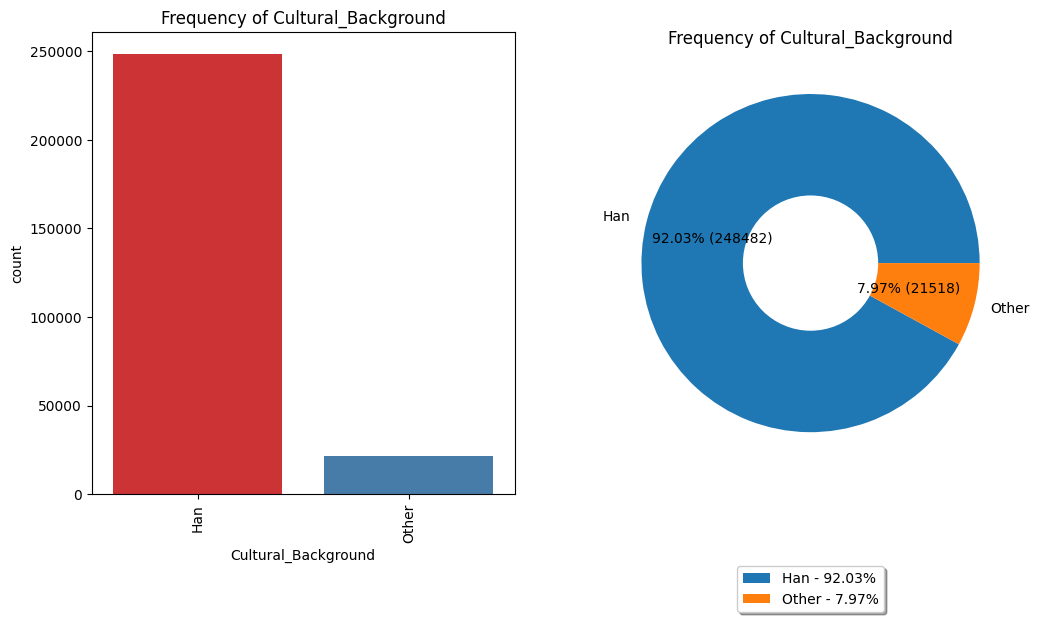

           Age_Group      Ratio
Age_Group                      
Adult         230926  85.528148
Youth          39074  14.471852


<ipython-input-20-f4f194a536b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")


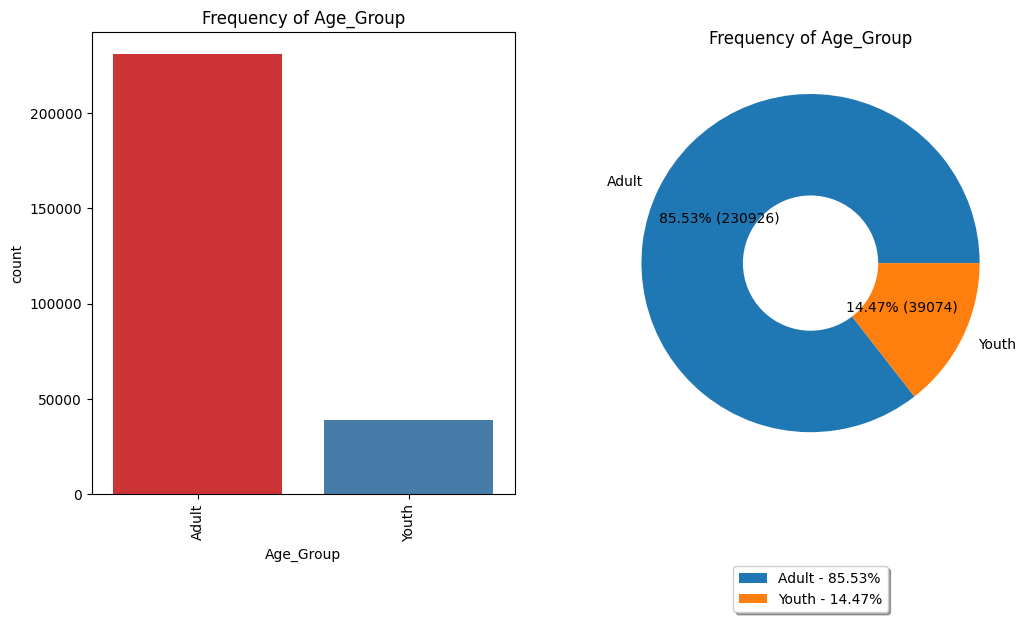

In [20]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        hole = plt.Circle((0, 0), 0.40, facecolor='white')
        plt.gcf().gca().add_artist(hole)
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True)

**Correlation Matrix**

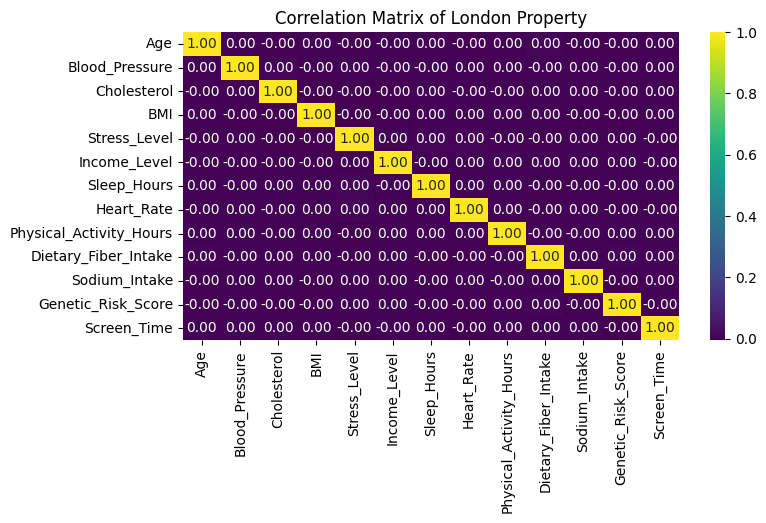

In [21]:
# Select only columns with int and float data types
numerical_df = df.select_dtypes(include=["int64", "float64"])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot and Show the Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix of London Property")
plt.show()

In [22]:
# Preprocessing Values
HeartAttack_map = {"No": 0, "Yes": 1}
Smoking_map = {"No": 0, "Yes": 1}
Diabetes_map = {"No": 0, "Yes": 1}
Alcohol_Consumption_map = {"None": 0, "Moderate": 1, "Heavy": 2}
Family_History_map = {"No": 0, "Yes": 1}
Exercise_Level_map = {"Low": 0, "Moderate": 1, "High": 2}
Education_map = {"Primary": 0, "Secondary": 1, "Tetiary": 2}
Residence_map = {"Rural": 0, "Urban": 1}
Marital_Status_map = {"Single": 0, "Divorced": 1, "Married": 2}
Medication_map = {"No": 0, "Yes": 1}
Hypertension_map = {"No": 0, "Yes": 1}
Age_Group_map = {"Youth": 0, "Adult": 1}
Diet_map = {"Unhealthy": 0, "Moderate": 1, "Healthy": 2}

<ipython-input-23-7e906e4bd286>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Heart_Attack", data=df, palette="pastel")


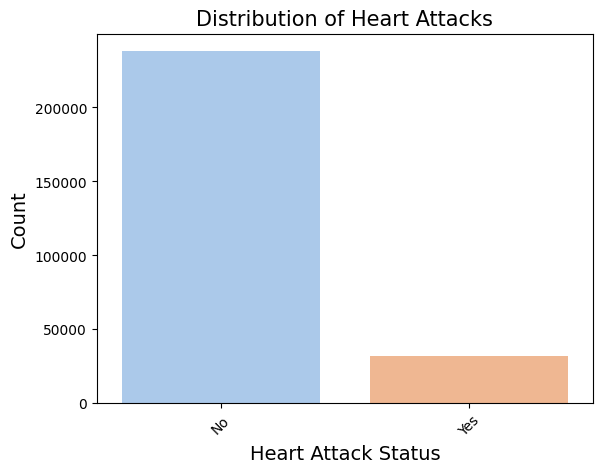

In [23]:
# Count Plot of Heart Attacks
sns.countplot(x="Heart_Attack", data=df, palette="pastel")
plt.title("Distribution of Heart Attacks", fontsize=15)
plt.xlabel("Heart Attack Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

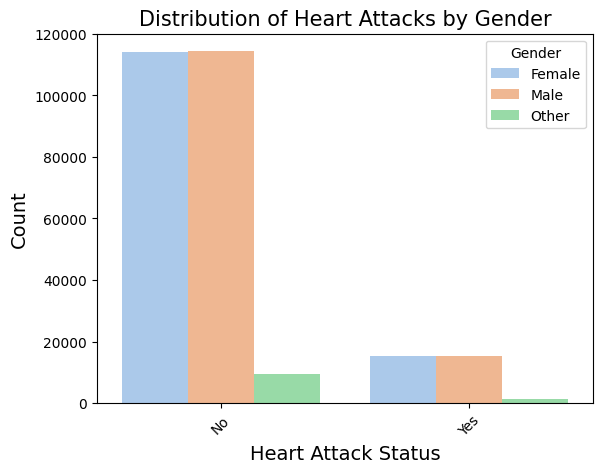

In [24]:
# Count Plot of Heart Attacks
sns.countplot(x="Heart_Attack", data=df, hue="Gender",palette="pastel")
plt.title("Distribution of Heart Attacks by Gender", fontsize=15)
plt.xlabel("Heart Attack Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

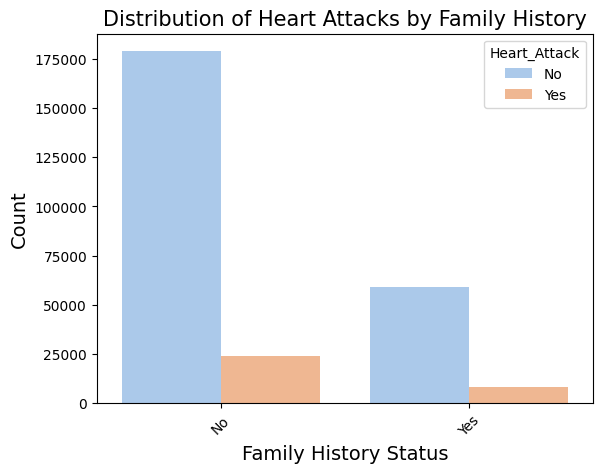

In [25]:
# Count Plot of any Family History of Heart Attacks
sns.countplot(x="Family_History", hue="Heart_Attack", data=df, palette="pastel")
plt.title("Distribution of Heart Attacks by Family History", fontsize=15)
plt.xlabel("Family History Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ["No", "Yes"])
plt.xticks(rotation=45)
plt.show()

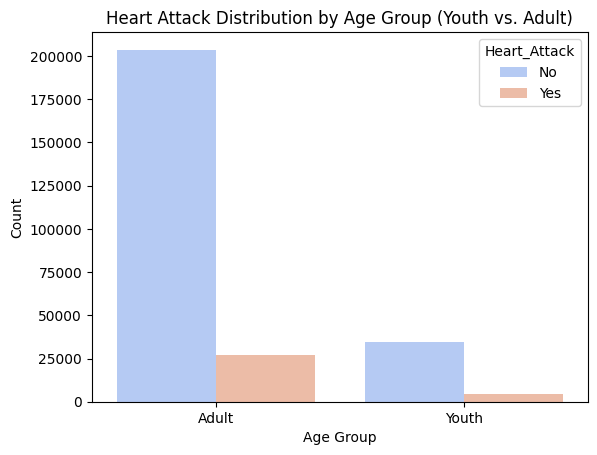

In [26]:
sns.countplot(data=df, x='Age_Group', hue='Heart_Attack', palette='coolwarm')
plt.title('Heart Attack Distribution by Age Group (Youth vs. Adult)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

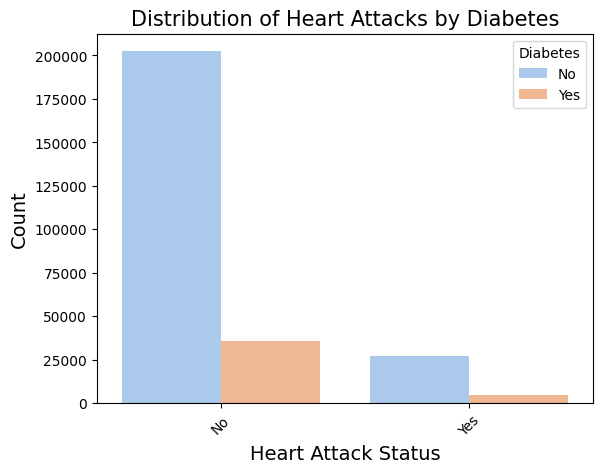

In [27]:
# Count Plot of Heart Attacks
sns.countplot(x="Heart_Attack", data=df, hue="Diabetes",palette="pastel")
plt.title("Distribution of Heart Attacks by Diabetes", fontsize=15)
plt.xlabel("Heart Attack Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

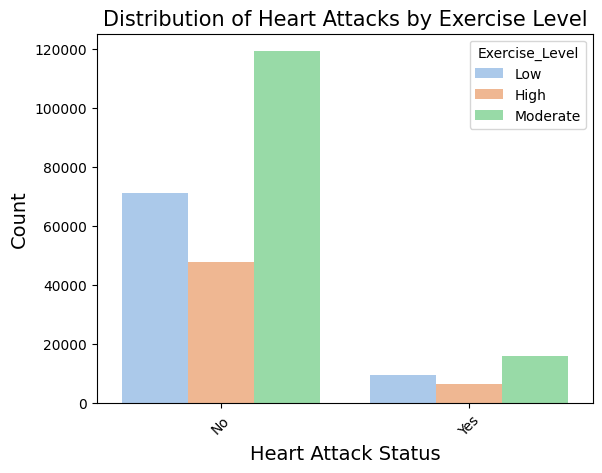

In [28]:
# Count Plot of Heart Attacks
sns.countplot(x="Heart_Attack", data=df, hue="Exercise_Level",palette="pastel")
plt.title("Distribution of Heart Attacks by Exercise Level", fontsize=15)
plt.xlabel("Heart Attack Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

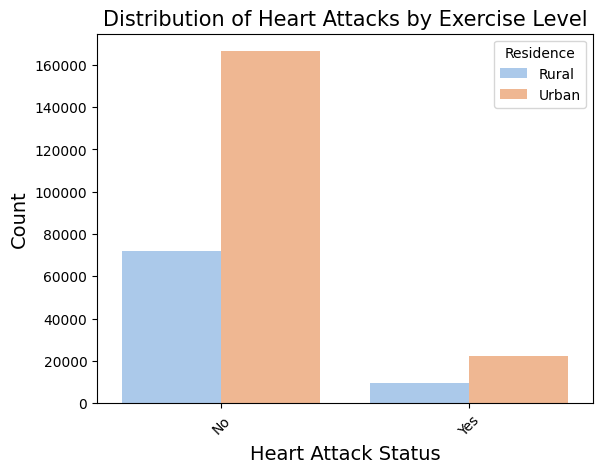

In [29]:
# Count Plot of Heart Attacks
sns.countplot(x="Heart_Attack", data=df, hue="Residence",palette="pastel")
plt.title("Distribution of Heart Attacks by Exercise Level", fontsize=15)
plt.xlabel("Heart Attack Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

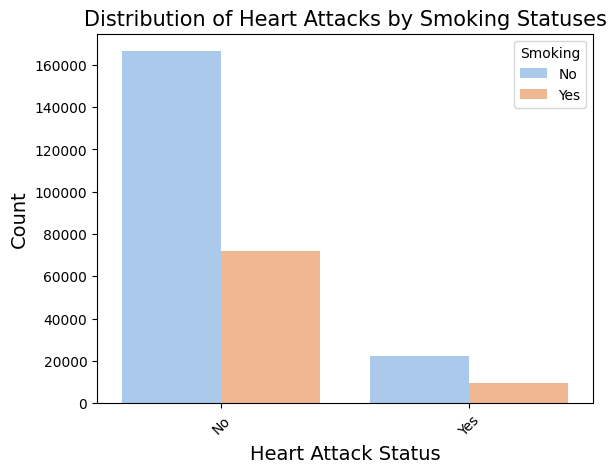

In [30]:
# Count Plot of Heart Attacks
sns.countplot(x="Heart_Attack", data=df, hue="Smoking",palette="pastel")
plt.title("Distribution of Heart Attacks by Smoking Statuses", fontsize=15)
plt.xlabel("Heart Attack Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

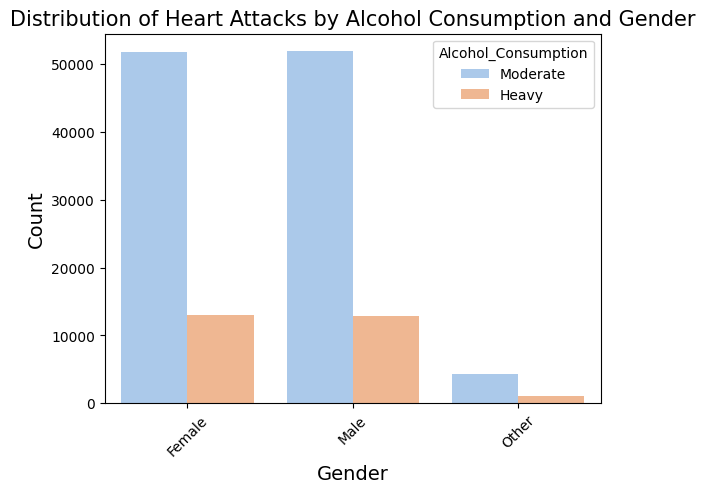

In [43]:
# Count Plot of Heart Attacks
sns.countplot(x="Gender", data=df, hue="Alcohol_Consumption",palette="pastel")
plt.title("Distribution of Heart Attacks by Alcohol Consumption and Gender", fontsize=15)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

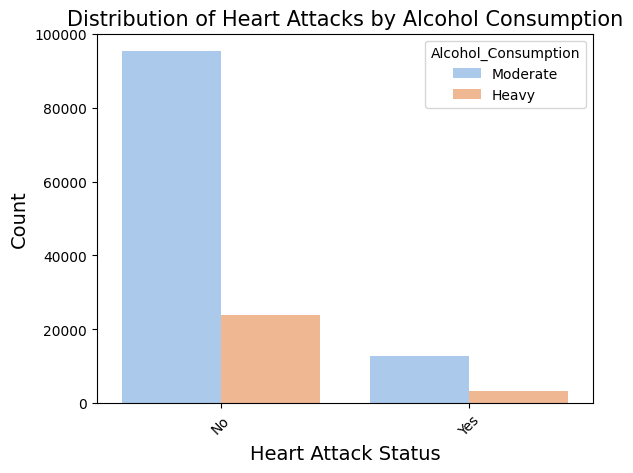

In [32]:
# Count Plot of Heart Attacks
sns.countplot(x="Heart_Attack", data=df, hue="Alcohol_Consumption",palette="pastel")
plt.title("Distribution of Heart Attacks by Alcohol Consumption", fontsize=15)
plt.xlabel("Heart Attack Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

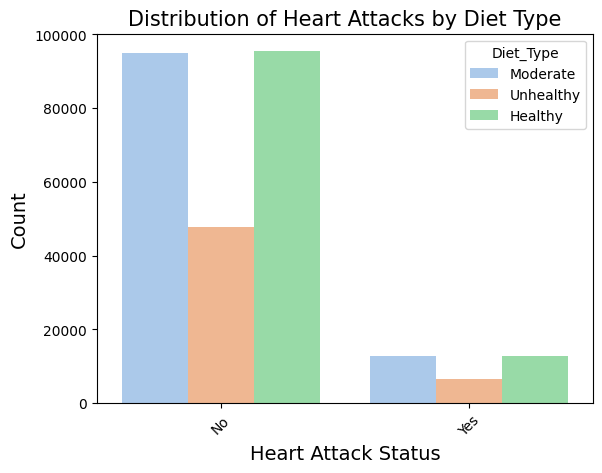

In [33]:
# Count Plot of Heart Attacks
sns.countplot(x="Heart_Attack", data=df, hue="Diet_Type",palette="pastel")
plt.title("Distribution of Heart Attacks by Diet Type", fontsize=15)
plt.xlabel("Heart Attack Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

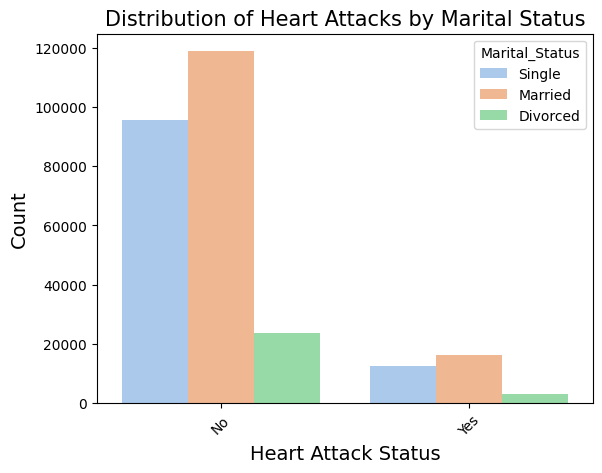

In [34]:
# Count Plot of Heart Attacks
sns.countplot(x="Heart_Attack", data=df, hue="Marital_Status",palette="pastel")
plt.title("Distribution of Heart Attacks by Marital Status", fontsize=15)
plt.xlabel("Heart Attack Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

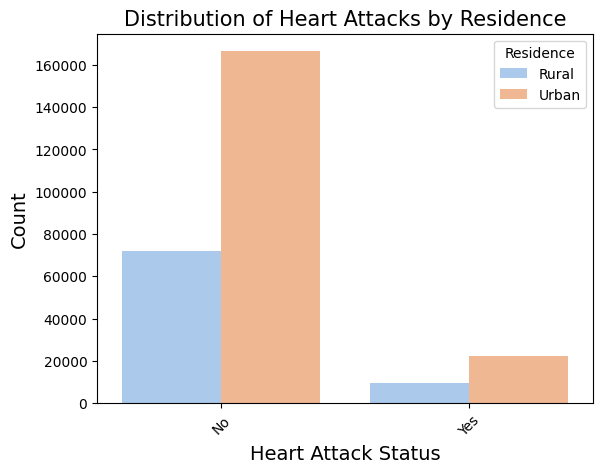

In [35]:
# Count Plot of Heart Attacks
sns.countplot(x="Heart_Attack", data=df, hue="Residence",palette="pastel")
plt.title("Distribution of Heart Attacks by Residence", fontsize=15)
plt.xlabel("Heart Attack Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

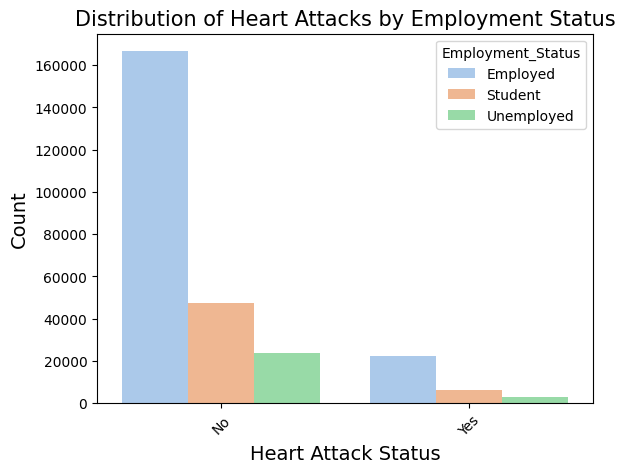

In [36]:
# Count Plot of Heart Attacks
sns.countplot(x="Heart_Attack", data=df, hue="Employment_Status",palette="pastel")
plt.title("Distribution of Heart Attacks by Employment Status", fontsize=15)
plt.xlabel("Heart Attack Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

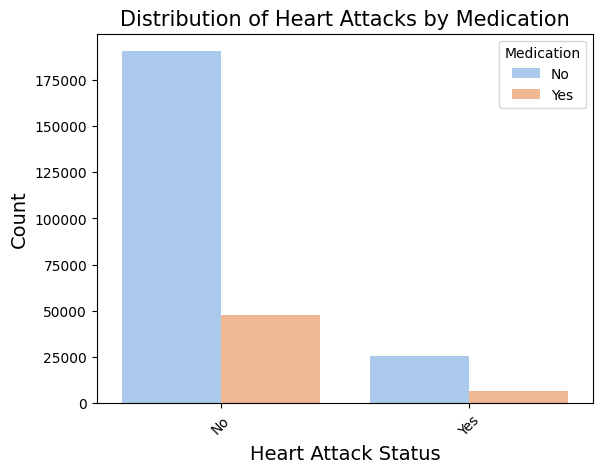

In [37]:
# Count Plot of Heart Attacks
sns.countplot(x="Heart_Attack", data=df, hue="Medication",palette="pastel")
plt.title("Distribution of Heart Attacks by Medication", fontsize=15)
plt.xlabel("Heart Attack Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Machine Learning

In [38]:
from sklearn.metrics import accuracy_score

# Setting up our features and target
features = ['Age', 'Blood_Pressure', 'Cholesterol', 'BMI', 'Stress_Level',
            'Sleep_Hours','Physical_Activity_Hours', 'Sodium_Intake','Screen_Time']
X = df[features]
Y = df['Heart_Attack'].map({'Yes': 1, 'No': 0})  # Convert to numerical data

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [40]:
from sklearn.ensemble import RandomForestClassifier
# Train the Model (Classifier)
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Since R2 is not ideal for classification, calculate R2 for probabilities:
prob_predictions = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
mse = mean_squared_error(y_test, prob_predictions)
mae = mean_absolute_error(y_test, prob_predictions)

print(classification_report(y_test, predictions))
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     47572
           1       0.00      0.00      0.00      6428

    accuracy                           0.88     54000
   macro avg       0.44      0.50      0.47     54000
weighted avg       0.78      0.88      0.83     54000

Mean Squared Error: 0.10
Mean Absolute Error: 0.21


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


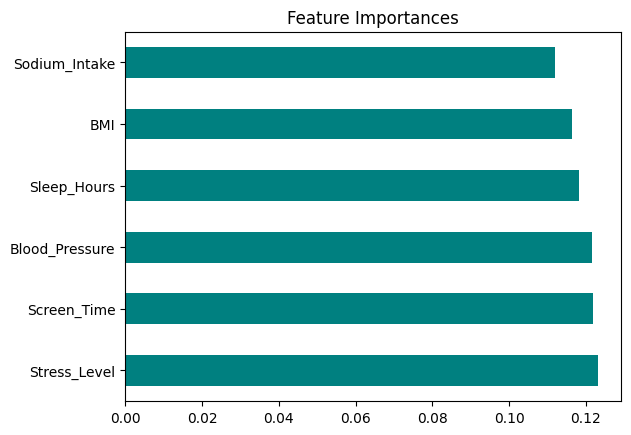

In [41]:
# Visualizing the importance of the top 6 largest columns
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(6).plot(kind="barh", color="teal")
plt.title("Feature Importances")
plt.show()

# Conclusion
Adults are more likely to experience heart attacks than those who are younger. Various lifestyle factors can influence the likelihood of a heart attack, such as dietary habits, smoking, Alcohol Consumption, exercise, and so on. Factors like employment, marital status, and area of residence can also affect the likelihood of a heart attack. The Random Forest Regression Model demonstrates an exceptional level of accuracy in predicting the likelihood of a heart attack.
